<b>Author:Menna Ashraf<b>

<h1><b><font color='green'>IRIS Classification - K Means Clustering</font><b><h1>

<h3><font color='orange'>This is a Classification exercise on the IRIS plant to predict the best number of classes could be found on the iris dataset using K-means .<font color='orange'><h3>

In [39]:
#import the needed libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

firstly, start with Data Collection

Load the IRIS dataset:

In [40]:
iris=pd.read_csv('Iris.csv')

read the first 7 rows in the dataset:

In [41]:
iris.head(7)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
5,6,5.4,3.9,1.7,0.4,Iris-setosa
6,7,4.6,3.4,1.4,0.3,Iris-setosa


In [42]:
#get more understanding of the dataset
iris.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


understand the data nature of data type and nullable values:

In [43]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


check if there are any duplicated values to clean

In [44]:
iris.duplicated(subset=None,keep='first').sum()

0

now that there are no nullable or duplicated values. we can use our dataset and start plotting our data!

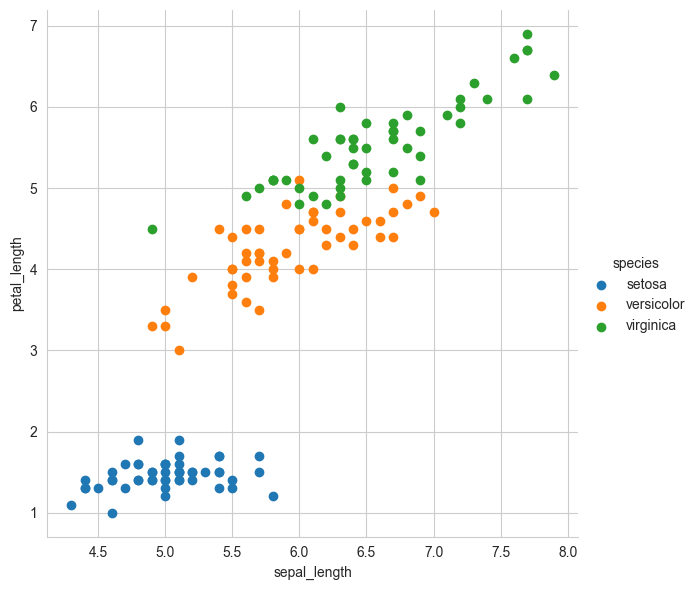

In [45]:
#plot the data using seaborn
iris = sns.load_dataset('iris')
sns.set_style("whitegrid")
sns.FacetGrid(iris, hue ="species",
              height = 6).map(plt.scatter,
                              'sepal_length',
                              'petal_length').add_legend()


from the plot it can be clear that there are <b><font color='orange'>3 major classes(Species)</font></b>:

1)Setosa

2)Vesicolor

3)Virginica

For More clarification we can use Elbow Method :

Start preparing our data for Elbow Method:

In [46]:
#define X variable = values of iris (removing the ID column and column names)
SumOfSquaredDistance=[]
X=iris.iloc[:, [0, 1, 2, 3]].values
X

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [47]:
#calculate sum of squared distance:
K=range(1,11)
for k in K:
    KMean=KMeans(n_clusters=k)
    KMean.fit(X)
    SumOfSquaredDistance.append(KMean.inertia_)

In [48]:
SumOfSquaredDistance

[681.3706,
 152.3479517603579,
 78.85144142614601,
 57.22847321428571,
 46.44618205128205,
 39.03998724608725,
 34.40900974025974,
 30.476222943722952,
 27.930758793393238,
 26.25375881291052]

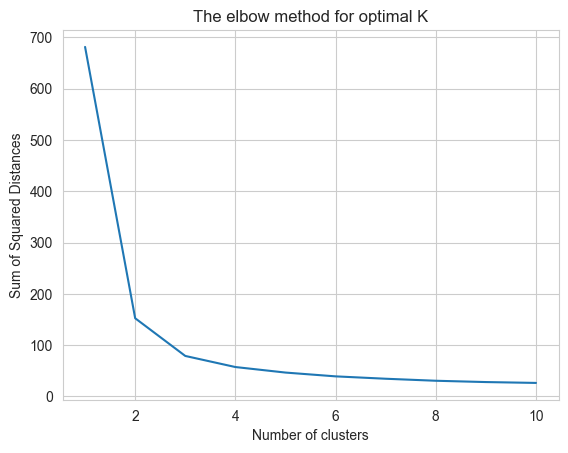

In [49]:
#Elbow Plot
plt.plot(K, SumOfSquaredDistance)
plt.title('The elbow method for optimal K')
plt.xlabel('Number of clusters') #K
plt.ylabel('Sum of Squared Distances') # Within cluster sum of squares(WCSS)
plt.show()

Using the Elbow Method it can be more clear that the optimum number of <font color='orange'><b>K=3</b></font> (3 Classes/Species)